<a href="https://colab.research.google.com/github/Ahmed-naeem-10/firstgit/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

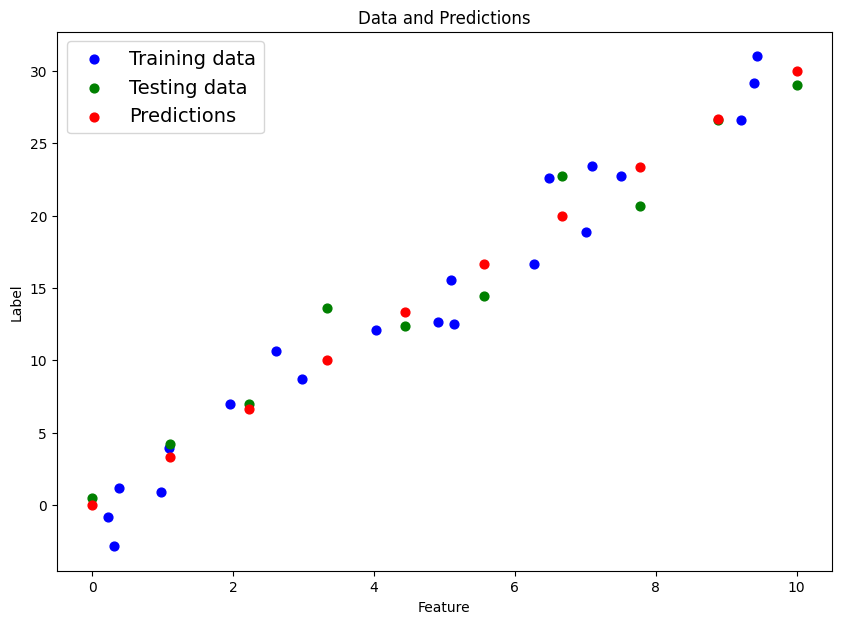

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the plot_predictions function
def plot_predictions(train_data, train_labels, test_data, test_labels, prediction=None):
    """
    Plots training data, testing data, and predictions if provided.

    Args:
        train_data: Training data (features).
        train_labels: Training labels (targets).
        test_data: Testing data (features).
        test_labels: Testing labels (targets).
        prediction: Model predictions (optional).
    """
    # Ensure all inputs are 1D
    train_data = np.squeeze(train_data)
    train_labels = np.squeeze(train_labels)
    test_data = np.squeeze(test_data)
    test_labels = np.squeeze(test_labels)

    if prediction is not None:
        prediction = np.squeeze(prediction)

    plt.figure(figsize=(10, 7))

    # Plot training data
    plt.scatter(train_data, train_labels, c="b", s=40, label="Training data")

    # Plot testing data
    plt.scatter(test_data, test_labels, c="g", s=40, label="Testing data")

    # Plot predictions if available
    if prediction is not None:
        plt.scatter(test_data, prediction, c="r", s=40, label="Predictions")

    # Add legend and labels
    plt.legend(prop={"size": 14})
    plt.xlabel("Feature")
    plt.ylabel("Label")
    plt.title("Data and Predictions")
    plt.show()

# Example usage with proper alignment of data
# Mock data
X_train = np.random.rand(20, 1) * 10  # 20 samples, single feature
y_train = 3 * X_train + np.random.randn(20, 1) * 2

X_test = np.linspace(0, 10, 10).reshape(-1, 1)  # 10 samples, single feature
y_test = 3 * X_test + np.random.randn(10, 1) * 2

# Mock predictions
predictions = 3 * X_test  # Ideal linear predictions without noise

# Call the function
plot_predictions(X_train, y_train, X_test, y_test, prediction=predictions)


In [ ]:
from torch import nn
import torch

class LinearRegrssion(nn.Module):  # If you want to keep this name
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


In [ ]:
torch.manual_seed(42)
model_0 = LinearRegrssion()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.rand(1)

tensor([0.3904])

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.1288],
        [0.5029],
        [0.8770],
        [1.2511],
        [1.6252],
        [1.9993],
        [2.3734],
        [2.7475],
        [3.1216],
        [3.4957]], dtype=torch.float64)

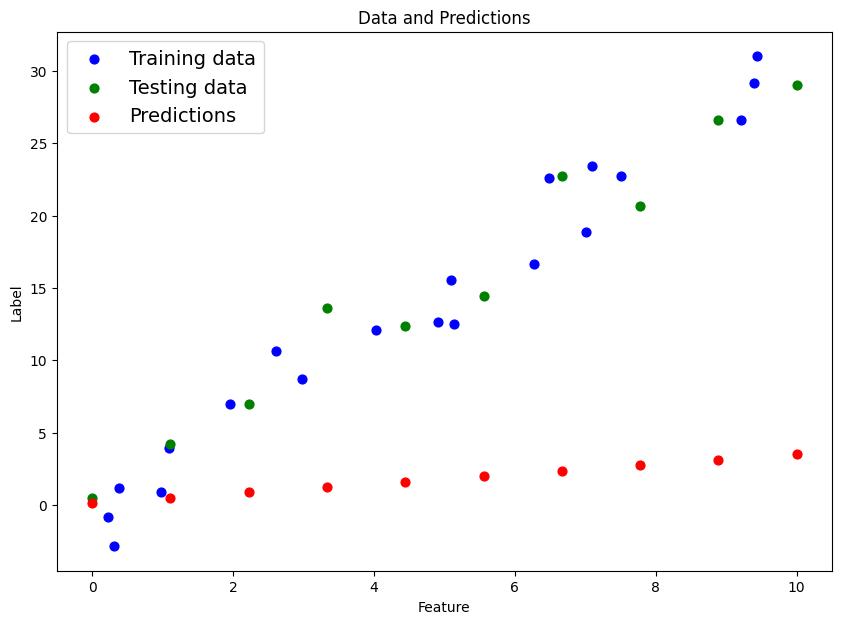

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, prediction=y_preds)

In [ ]:
lose_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [ ]:
import torch
epochs = 100
# Define a loss function (MSELoss for regression)
loss_fn = torch.nn.MSELoss()

# Ensure X_train and y_train are tensors
X_train = torch.tensor(X_train, dtype=torch.float32)  # Convert to float tensor
y_train = torch.tensor(y_train, dtype=torch.float32)  # Adjust dtype as needed

# If using GPU, move tensors to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)

# Training loop
for epoch in range(epochs):
    model_0.train()

    # Forward pass
    y_preds = model_0(X_train)  # Predictions

    # Compute loss
    loss = loss_fn(y_preds, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# After training
model_0.eval()


Epoch 1, Loss: 222.7106170654297
Epoch 2, Loss: 34.45573425292969
Epoch 3, Loss: 8.362428665161133
Epoch 4, Loss: 4.739470481872559
Epoch 5, Loss: 4.230249881744385
Epoch 6, Loss: 4.1525750160217285
Epoch 7, Loss: 4.134787082672119
Epoch 8, Loss: 4.125380516052246
Epoch 9, Loss: 4.117220401763916
Epoch 10, Loss: 4.109314441680908
Epoch 11, Loss: 4.101524829864502
Epoch 12, Loss: 4.093832969665527
Epoch 13, Loss: 4.086234092712402
Epoch 14, Loss: 4.078727722167969
Epoch 15, Loss: 4.071310520172119
Epoch 16, Loss: 4.063982963562012
Epoch 17, Loss: 4.056743621826172
Epoch 18, Loss: 4.0495924949646
Epoch 19, Loss: 4.0425262451171875
Epoch 20, Loss: 4.03554630279541
Epoch 21, Loss: 4.02864933013916
Epoch 22, Loss: 4.021836280822754
Epoch 23, Loss: 4.015105247497559
Epoch 24, Loss: 4.0084547996521
Epoch 25, Loss: 4.001885414123535
Epoch 26, Loss: 3.995394229888916
Epoch 27, Loss: 3.9889817237854004
Epoch 28, Loss: 3.982646942138672
Epoch 29, Loss: 3.9763870239257812
Epoch 30, Loss: 3.9702041

LinearRegrssion()

In [ ]:
with torch.inference_mode():
   y_preds_new = model_0(X_test)

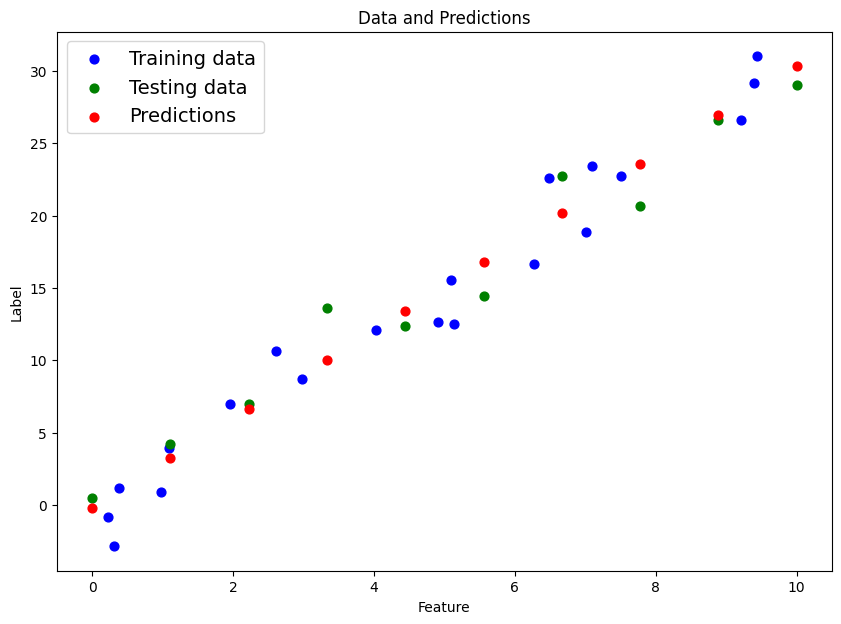

In [ ]:

plot_predictions(X_train, y_train, X_test, y_test, prediction=y_preds_new)

In [ ]:
# Ensure y_preds is flattened if needed
if isinstance(y_preds, torch.Tensor):
    y_preds = y_preds.detach().numpy()

if len(y_preds.shape) > 1:
    y_preds = y_preds.squeeze()


ValueError: x and y must be the same size

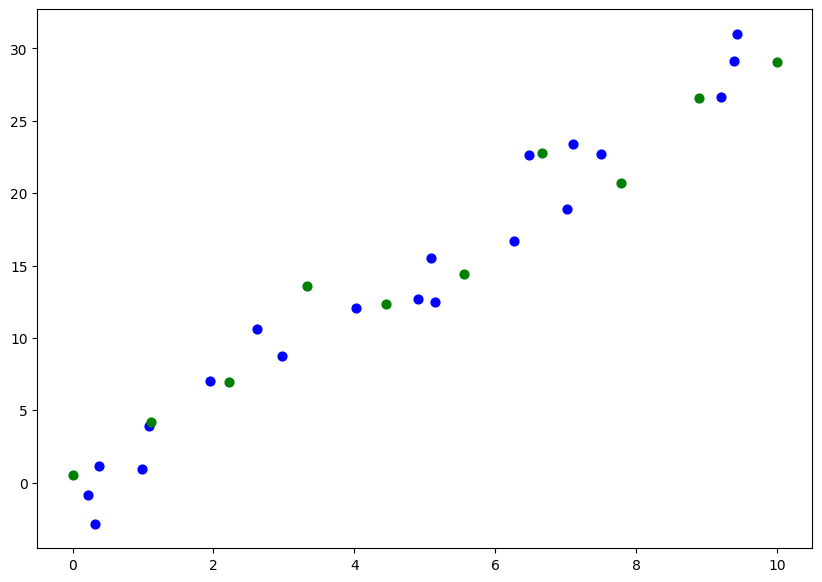

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, prediction=y_preds)

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles
n_sample = 1000
x , y = make_circles(n_sample,
                     noise=0.03,
                     random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:


















print(f"First 5 samples of x:\n {x[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")


First 5 samples of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:

y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:

x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:,1],
                        "labels":y})
circles.head

<bound method NDFrame.head of            x1        x2  labels
0    0.754246  0.231481       1
1   -0.756159  0.153259       1
2   -0.815392  0.173282       1
3   -0.393731  0.692883       1
4    0.442208 -0.896723       0
..        ...       ...     ...
995  0.244054  0.944125       0
996 -0.978655 -0.272373       0
997 -0.136900 -0.810012       1
998  0.670362 -0.767502       0
999  0.281057  0.963824       0

[1000 rows x 3 columns]>

In [ ]:
import pandas as pd
circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:,1],
                        "labels":y})
circles.head

<bound method NDFrame.head of            x1        x2  labels
0    0.754246  0.231481       1
1   -0.756159  0.153259       1
2   -0.815392  0.173282       1
3   -0.393731  0.692883       1
4    0.442208 -0.896723       0
..        ...       ...     ...
995  0.244054  0.944125       0
996 -0.978655 -0.272373       0
997 -0.136900 -0.810012       1
998  0.670362 -0.767502       0
999  0.281057  0.963824       0

[1000 rows x 3 columns]>

In [ ]:
import pandas as pd

In [ ]:
circles = pd.DataFrame({"x1": x[:, 0],
                        "x2": x[:,1],
                        "labels":y})
circles.head(10)

,x1,x2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


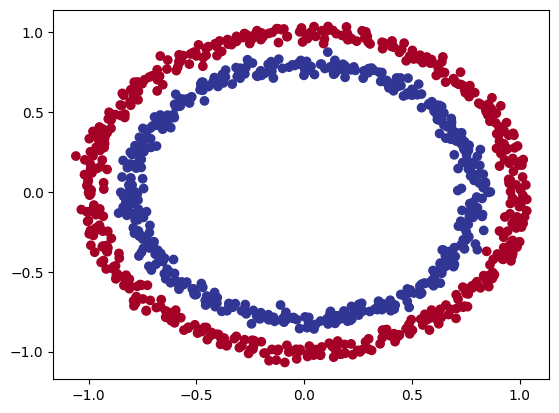

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
           y=x[:,1],
           c=y,
           cmap=plt.cm.RdYlBu );

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import torch

In [ ]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_sample

1000

In [ ]:
import torch
from torch import nn

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
class CircleModel(nn.Module):
  def __init__():
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
  def forword(self, x):
    return self.layer_2(self.layer_1(x))

model_1 = CircleModel().to(device)

model_1

TypeError: CircleModel.__init__() takes 0 positional arguments but 1 was given

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')